In [1]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
folder_to_name = {'hsbam': 'hsbam',
                  'wtF': 'wtF',
                  'wtJ': 'wtJ',
                  '96h': '96h',
                  'traffic_jam': 'tjdpp',
                  'bam_mutants': 'bam',
                  'oskar': 'osk'
                 }
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/raw data"
data_frames = {}

tech = 'cellranger'

for folder in folder_to_name:
    subfolder = folder_to_name[folder]
    matrix_dir = os.path.join(os.path.join(matrices_dir,subfolder), tech)
    mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))
 
    genes_path = os.path.join(matrix_dir, "genes.tsv")
    gene_ids = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
    gene_names = [row[1] for row in csv.reader(open(genes_path), delimiter="\t")]
 
    barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
    barcodes = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
    arr=mat.toarray()
    df = pd.DataFrame(arr)
    df.index = gene_names
    df.columns = barcodes 
    data_frames[folder] = df

In [46]:
df = data_frames['wtJ']
df.shape

(17433, 1178)

In [47]:
np.var(T, axis = 1)

l(2)gl                     1.400150
CR43609                    0.012162
dbr                        0.724574
CR44987                    0.014162
galectin                   0.915914
Zir                        0.634240
CG11377                    0.375374
Nhe1                       0.195302
Sam-S                      4.600891
ND-15                      7.679059
CG4822                     0.390355
CG3164                     1.385774
Gs1                        0.235822
CG11454                    0.617842
CG3709                     0.146436
CG3436                     1.286774
CG33635                    0.654438
spen                      13.725191
mRpL10                     0.909477
CG11617                    0.006014
Tbc1d15-17                 0.395191
kis                        5.578526
CR44218                    0.038126
Rpp30                      0.623106
CG3645                     0.248348
CG17075                    0.042512
mbm                        0.682179
CG11555                    0

In [48]:
X = df
num_transcripts = np.sum(X, axis=0)
# filter sum below 20
X = X.loc[count_gene > 20, :]
T = (np.median(num_transcripts) / num_transcripts) * X

In [49]:
count_gene = df[df > 0].count(axis = 1)


In [50]:
nUMI = df.sum(axis = 0)
nUMI

AAACCTGAGATACACA-1    44408
AAACGGGGTAAAGTCA-1    43979
AAACGGGTCAGTACGT-1    26451
AAAGATGCAGGACGTA-1     7378
AAAGATGCATCCGTGG-1    15032
AAAGATGTCTGGTATG-1    20758
AAAGCAATCTGTCCGT-1    16092
AAAGTAGAGGACATTA-1    25266
AAAGTAGCAGACAAAT-1    10052
AAAGTAGCAGGAATCG-1     8241
AAAGTAGGTAAGTAGT-1    34445
AAAGTAGTCCGCGCAA-1    10598
AAATGCCGTGCGAAAC-1    22161
AACACGTAGGCCCTTG-1    67926
AACCATGCATTCTTAC-1    19393
AACCATGTCAAGGCTT-1    14700
AACCATGTCACCCTCA-1    10206
AACCATGTCAGTCAGT-1    12739
AACCATGTCTATCGCC-1    23681
AACCGCGAGTCAATAG-1    30340
AACCGCGGTTGGGACA-1    20238
AACGTTGCAGGGATTG-1    35944
AACGTTGCAGTAAGCG-1    77230
AACGTTGGTAGGGTAC-1    61000
AACGTTGTCGGAGGTA-1     9673
AACTCCCCAGCTGTGC-1     9089
AACTCCCTCCCGACTT-1    21455
AACTTTCAGCGATGAC-1    29684
AACTTTCCAATGAATG-1     9595
AACTTTCCAGTATGCT-1    23867
                      ...  
TTCTCCTTCTTGAGGT-1     9713
TTCTTAGGTCACAAGG-1    17797
TTGAACGCACGCCAGT-1    36707
TTGACTTAGCCCAGCT-1    24229
TTGACTTGTATTAGCC-1  

In [51]:
E = np.mean(T, axis = 1)
CV = np.sqrt(np.var(T, axis = 1)) / E

In [44]:

x = np.linspace(-2.5,2.5,1000) # 100 linearly spaced numbers
y = -.5 * x # computing the values of sin(x)/x

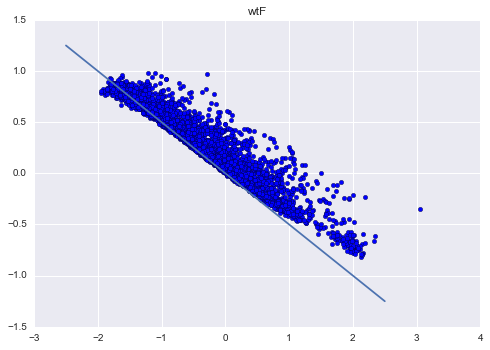

In [45]:
plt.scatter(np.log10(E), np.log10(CV))
# compose plot
plt.plot(x,y)
plt.title('wtF')
plt.show()

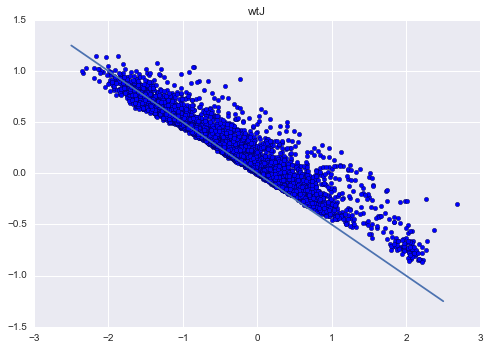

In [53]:
plt.scatter(np.log10(E), np.log10(CV))
plt.title('wtJ')
plt.plot(x,y)
plt.show()

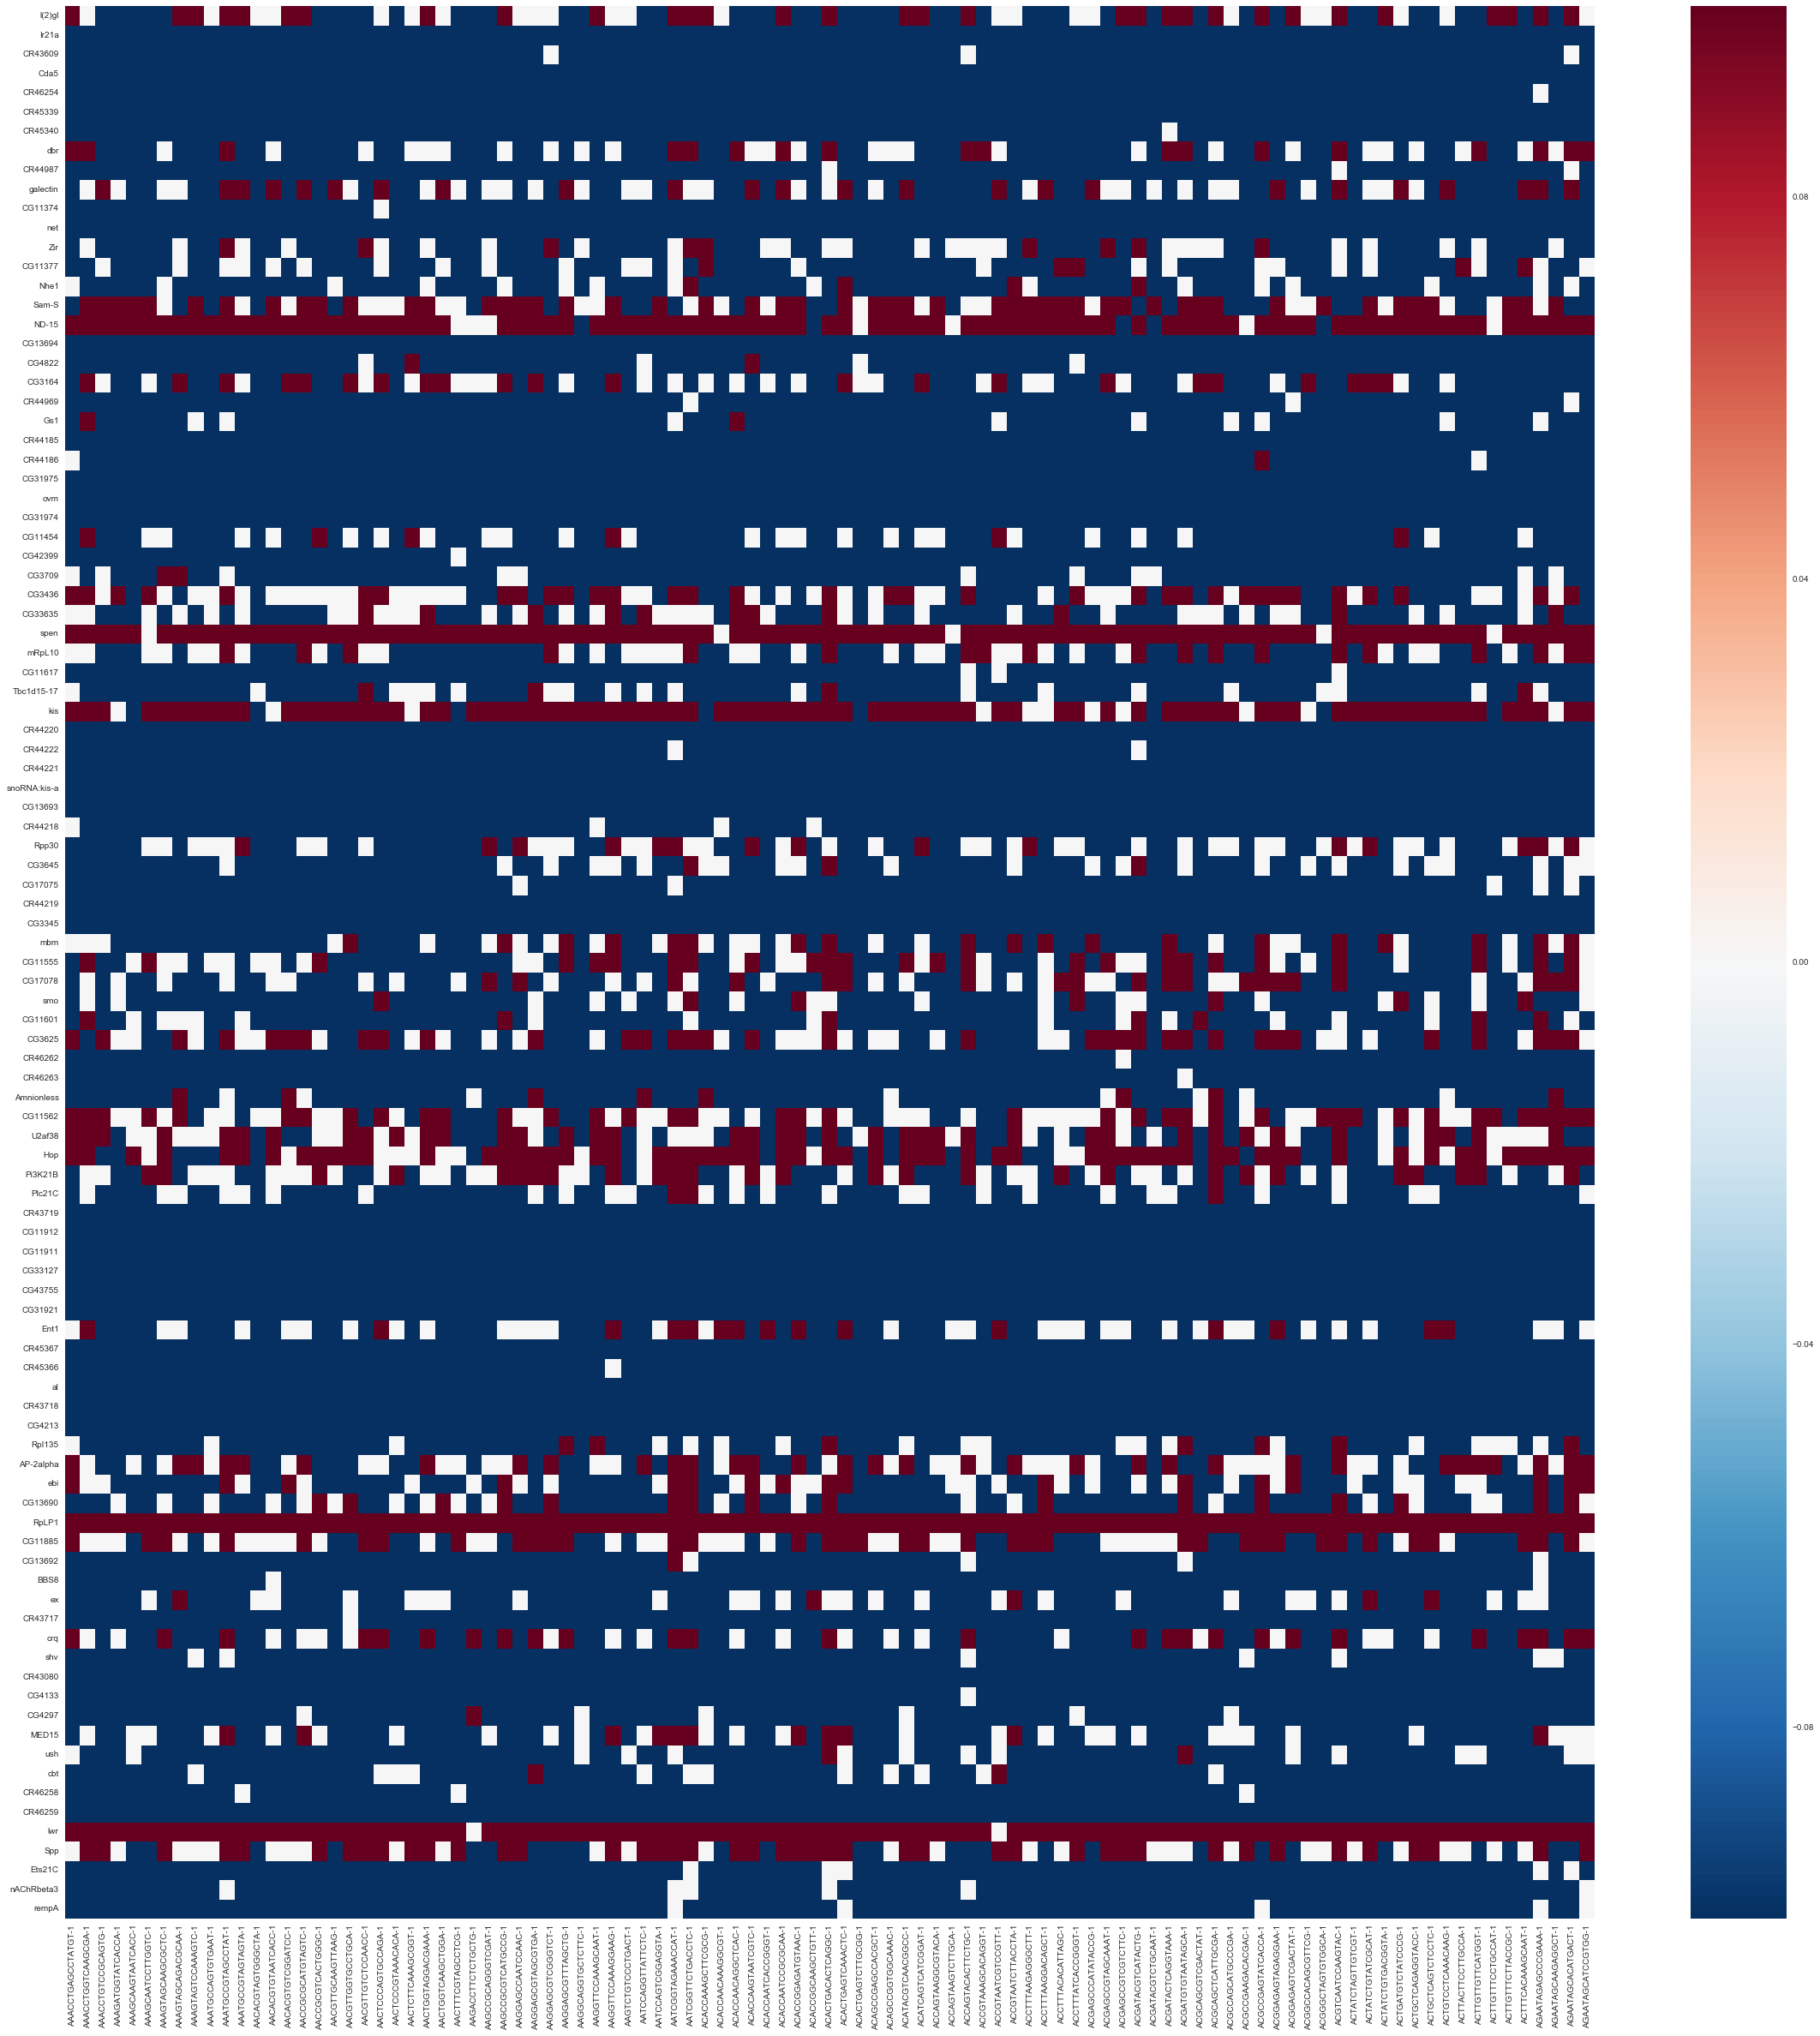

In [8]:
plt.figure(figsize=(40, 40))
sns.heatmap(np.log(data_frames['wtF'].iloc[1:100, 1:100]))